In [3]:
import numpy as np
import numpy.matlib
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from random import randint


In [4]:
from keras.datasets import mnist

Given code
-----------


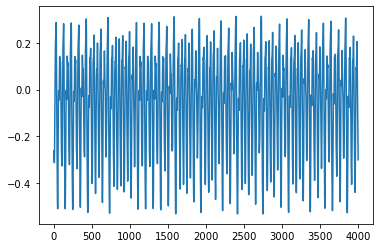

In [5]:

# check for intuition at  http://users.fs.cvut.cz/ivo.bukovsky/PVVR/prace_studentu/Mackey_Glass_time_series_prediction_Fuzzy_Lookup.pdf

def mackey_glass(tau, length):
    betta=0.2
    gamma = 0.1 
    a=10
    delay=100 # will cut these initial steps
    
    y=np.random.rand(tau) # random intial values between 0 and 1
    # Euler's method to solve the differential equation
    for t in range(tau-1, length+delay+tau-1):
        current= y[t] + ( betta * y[t-(tau-1)]   / ( 1 + np.power(y[t-(tau-1)], a) 
)  ) - gamma*y[t]   
        y=np.append(y, current)
    
    y=y-1 # get rid of mean
    y=np.tanh(y) # squeze with tanh    
    
    return y[tau+delay:length+delay+tau] # return the last length elements
length=4000 # duration of the series
tau=17 # delay in the equation
y=mackey_glass(tau, length)
#plot generated time-series
plt.plot(y)
plt.show()

part 1:
-----


Generate a sequence for 4,000 time steps; n is in the range between 1 and 4,000

In [19]:
def generateSequence(parameters):
    valueArray = []
    for n in range(parameters[0],parameters[1]+1):
        value = 0.5 * math.sin(n/4)
        valueArray.append(value) 
    return(valueArray)

In [22]:
rangeParameters = [1, 4000] 
dataValues = generateSequence(rangeParameters)
print(len(dataValues))


4000


Part 2:
------------
Take the first 3,000 steps for the training and leave the last 1,000 steps forthe testing

In [31]:
def splitArrayTwo(array, firstLength):
    firstArray = array[:firstLength]
    secoundArray = array[firstLength:]
    firstArray = np.array(firstArray)
    secoundArray = np.array(secoundArray)
    return firstArray, secoundArray


In [32]:
train_Data , test_Data = splitArrayTwo(dataValues,3000)
print(len(train_Data), len(test_Data))

3000 1000


Part 3:
--------
Fix the reservoir size to Nx = 1,000 neurons

In [33]:
reservoirSize = 1000

Part 4:
---------
 Generate input weight matrix Win from uniform distribution between -1 and 1. Scale Win by 0.2.

In [ ]:
scale = 0.2
weight_min = -1
weight_max = 1